Report Questions:

A. At Milwaukee tool we are working on numerous machine learning applicaitons that take incoming information and classify it for later use. Our marketing department loves to ask for machine learning to be included on tools and they do not questions decisions that are made with the help of machine learning. As an outcome of this certificate, I will be starting a project to build a machine learning model to help classify tools that comeback from the field so we can better unserstand what users are doing with the tool.

B. The missing values could be the congressmen was not present for the vote or they obstained.

C. The decision treen used 17 of the 32 features. They are listed below:
handicapped-infants_n
water-project-cost-sharing_n
water-project-cost-sharing_y
adoption-of-the-budget-resolution_n
adoption-of-the-budget-resolution_y
physician-fee-freeze_n
physician-fee-freeze_y
religious-groups-in-schools_y
mx-missile_n 
immigration_y 
synfuels-corporation-cutback_y 
education-spending_n 
education-spending_y 
superfund-right-to-sue_y  
crime_yduty-free-exports_n 
duty-free-exports_y
export-administration-act-south-africa_y

I think there are probably certain features that are very similar and don't need to be used to produce a useful tree.

D. From the decsion tree the top 3 features are:
1. physician-fee-freeze_y
2. physician-fee-freeze_n
3. synfuels-corporation-cutback_y

From the importance scores
1. 0.78514274 - physician-fee-freeze_y
2. 0.0438593 - synfuels-corporation-cutback_y
3. 0.02224687 -  immigration_y

E. 
physician-fee-freeze_y =  True ->  physician-fee-freeze_n =  False -> adoption-of-the-budget-resolution_n = True -> 51.2% democrat

The democrats voted for the physician-fee-freeze and against adoption-of-the-budget-resolution.

physician-fee-freeze_y = False -> synfuels-corporation-cutback_y = True -> duty-free-exports_y =  True ->  adoption-of-the-budget-resolution_n = False -> 27.9% republican

The republicans votes for synfuels-corporation-cutback, duty-free-exports, and adoption-of-the-budget-resolution. They voted against the physician-fee-freeze. 

F. ccp_alpha = 0.1 had a higher accuracy but the graph was not a detailed (only criteria branching), the ccp_alpha = 0.
0001 had slightly worse accuracy but the graph showed much more deatil for each branch in the tree. I think the 0.0001 tree offered a better insight into voting trends.

G. 17 out of the 32 features overlap. The decision tree only uses 17 features where the logistical regression uses all features.

H. 
Republicans can be characterized by voting no for synfuels-corporation-cutback (Feature 20: Weight = 8.830033858296463).
Democrats can be characterized by voting yes for physician-fee-freeze (Feature 6: Weight = -16.57174575445524).

I. Both models characterize the voters similarly. The decision tree keeps comparaing smaller and smaller groups to get the groups sorted while the logistical looks at each feature seperatly before makings the final analysis.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

In [2]:
records_df = pd.read_csv("congressional_voting_records.csv")

records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class                                   435 non-null    object
 1   handicapped-infants                     423 non-null    object
 2   water-project-cost-sharing              387 non-null    object
 3   adoption-of-the-budget-resolution       424 non-null    object
 4   physician-fee-freeze                    424 non-null    object
 5   el-salvador-aid                         420 non-null    object
 6   religious-groups-in-schools             424 non-null    object
 7   anti-satellite-test-ban                 421 non-null    object
 8   aid-to-nicaraguan-contras               420 non-null    object
 9   mx-missile                              413 non-null    object
 10  immigration                             428 non-null    object
 11  synfue

In [3]:
records_df.head()

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [4]:
records_df.describe()

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [5]:
records_df.astype('category').dtypes

Class                                     category
handicapped-infants                       category
water-project-cost-sharing                category
adoption-of-the-budget-resolution         category
physician-fee-freeze                      category
el-salvador-aid                           category
religious-groups-in-schools               category
anti-satellite-test-ban                   category
aid-to-nicaraguan-contras                 category
mx-missile                                category
immigration                               category
synfuels-corporation-cutback              category
education-spending                        category
superfund-right-to-sue                    category
crime                                     category
duty-free-exports                         category
export-administration-act-south-africa    category
dtype: object

In [6]:
le = LabelEncoder()
le.fit(records_df.Class)
label_vector = le.transform(records_df.Class)

In [7]:
dummy_records_df = pd.get_dummies(records_df)

In [8]:
dummy_records_df = dummy_records_df.drop(['Class_democrat', 'Class_republican'], axis=1)

In [9]:
dummy_records_df.head()

,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,el-salvador-aid_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
1,True,False,False,True,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,False
2,False,False,False,True,False,True,False,False,False,True,...,True,False,False,True,False,True,True,False,True,False
3,True,False,False,True,False,True,True,False,False,False,...,True,False,False,True,True,False,True,False,False,True
4,False,True,False,True,False,True,True,False,False,True,...,False,False,False,True,False,True,False,True,False,True


In [10]:
dummy_records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   handicapped-infants_n                     435 non-null    bool 
 1   handicapped-infants_y                     435 non-null    bool 
 2   water-project-cost-sharing_n              435 non-null    bool 
 3   water-project-cost-sharing_y              435 non-null    bool 
 4   adoption-of-the-budget-resolution_n       435 non-null    bool 
 5   adoption-of-the-budget-resolution_y       435 non-null    bool 
 6   physician-fee-freeze_n                    435 non-null    bool 
 7   physician-fee-freeze_y                    435 non-null    bool 
 8   el-salvador-aid_n                         435 non-null    bool 
 9   el-salvador-aid_y                         435 non-null    bool 
 10  religious-groups-in-schools_n             435 non-null    bool

In [11]:
dummy_array = dummy_records_df.to_numpy()

In [12]:
label_vector

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [13]:
X = dummy_array
y = label_vector

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [14]:
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training label set shape:", y_train.shape)
print("Testing label set shape:", y_test.shape)

Training feature set shape: (326, 32)
Testing feature set shape: (109, 32)
Training label set shape: (326,)
Testing label set shape: (109,)


In [27]:
dtc = DecisionTreeClassifier(random_state=42, ccp_alpha = 0.0001)
cross_val_score(dtc, X_train, y_train, cv=10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, random_state=42)

In [28]:
y_pred = dtc.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.9357798165137615

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[65  2]
 [ 5 37]]


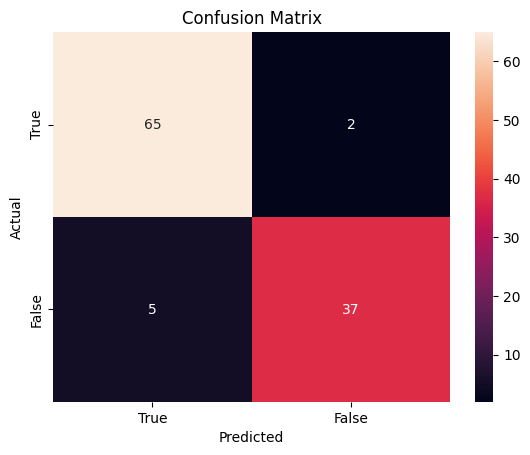

In [31]:
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

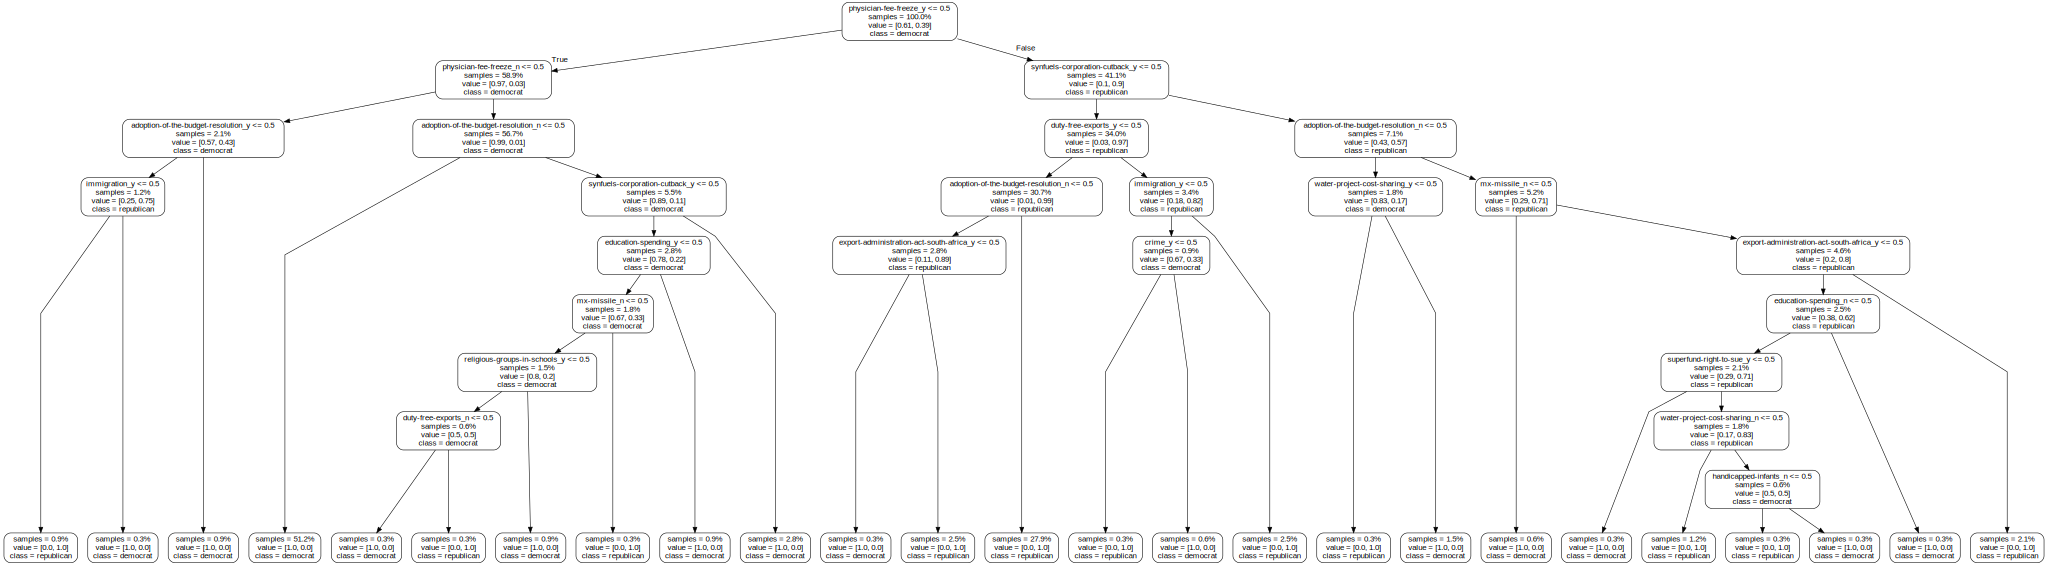

In [32]:
dot_data = export_graphviz(dtc, feature_names = dummy_records_df.columns, proportion=True, precision=2, rounded=True, class_names=le.classes_, impurity=False, leaves_parallel=True)
graph = graphviz.Source(dot_data)
graph

ccp_alpha = 0.1 had a higher accuracy but the graph was not a detailed (only criteria branching), the ccp_alpha = 0.
0001 had slightly worse accuracy but the graph showed much more deatil for each branch in the tree

In [90]:
tree_importances = dtc.feature_importances_

tree_significant_features = np.where(tree_importances > 0)[0]

In [57]:
sgdc = SGDClassifier(loss = 'log_loss')
sgdc.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

In [58]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9724770642201835

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[66  1]
 [ 2 40]]


In [60]:
pred = sgdc.predict_proba(X)
np.delete(pred, 1, axis = 1)

array([[5.12853240e-08],
       [3.15855865e-05],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.52965691e-01],
       [3.23436519e-06],
       [6.11271096e-07],
       [1.00000000e+00],
       [1.07178057e-04],
       [9.03209339e-04],
       [1.00000000e+00],
       [9.99999999e-01],
       [5.71598941e-05],
       [6.29496455e-12],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.87593382e-08],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99984673e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99998440e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.28768132e-13],
       [1.00000000e+00],
       [2.40604867e-04],
       [1.00000000e+00],
       [9.99999995e-01],
       [6.11271096e-07],
       [1.00000000e+00],
       [2.40604867e-04],
       [5.79536419e-14],
       [8.82307266e-07],
       [2.95347258e-09],
       [1.00000000e+00],


<Axes: ylabel='Count'>

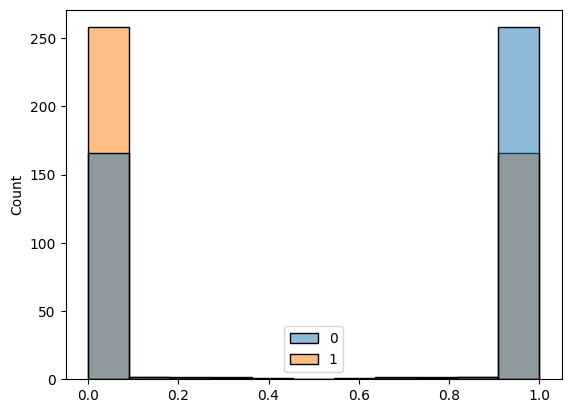

In [61]:
sns.histplot(data=pred)

In [83]:
coef = sgdc.coef_[0]
print(coef)

[ -4.26704026  -1.03710897  -1.67827597  -6.34702461   4.19571426
  -8.21520306 -16.57174575   7.53051482  -3.31941923   7.00861025
   0.87281942  -0.44831059  -1.39445569   1.79634159 -11.87666456
  -1.69333478   4.42515647  -3.99858802  -5.44186743   5.86630291
   8.83003386  -4.77267479 -11.91463318  -8.3177018    5.84043536
   4.71351734  -2.57456642  -4.12034016  -1.93088135  -7.32212885
  -2.03066419   3.94494659]


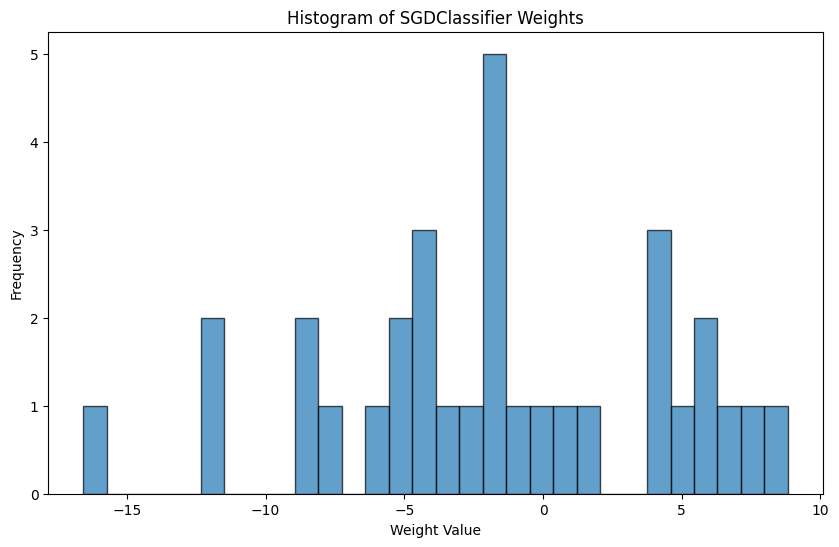

In [86]:
plt.figure(figsize=(10, 6))
plt.hist(coef, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of SGDClassifier Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

In [89]:
cutoff = 0.5
significant_features = np.where(np.abs(coef) > cutoff)[0]
print("Significant features from Logistic Regression (weight magnitude > {}):".format(cutoff))
for feature in significant_features:
    print(f"Feature {feature}: Weight = {coef[feature]}")

Significant features from Logistic Regression (weight magnitude > 0.5):
Feature 0: Weight = -4.267040264982483
Feature 1: Weight = -1.0371089731886372
Feature 2: Weight = -1.6782759733082717
Feature 3: Weight = -6.347024608557966
Feature 4: Weight = 4.19571426192353
Feature 5: Weight = -8.215203061007564
Feature 6: Weight = -16.57174575445524
Feature 7: Weight = 7.530514821889009
Feature 8: Weight = -3.3194192321617026
Feature 9: Weight = 7.008610254781771
Feature 10: Weight = 0.8728194183788126
Feature 12: Weight = -1.3944556911581163
Feature 13: Weight = 1.7963415939310345
Feature 14: Weight = -11.876664556877804
Feature 15: Weight = -1.6933347829025625
Feature 16: Weight = 4.425156474183576
Feature 17: Weight = -3.998588019089651
Feature 18: Weight = -5.441867427736509
Feature 19: Weight = 5.866302913947478
Feature 20: Weight = 8.830033858296463
Feature 21: Weight = -4.772674785159774
Feature 22: Weight = -11.914633178399216
Feature 23: Weight = -8.317701798621338
Feature 24: Weight

In [93]:
overlap = set(significant_features).intersection(tree_significant_features)

print("\nOverlap between Logistic Regression and Decision Tree features:")
print(overlap)


Overlap between Logistic Regression and Decision Tree features:
{np.int64(0), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(16), np.int64(19), np.int64(21), np.int64(22), np.int64(23), np.int64(25), np.int64(27), np.int64(28), np.int64(29), np.int64(31)}
